In [69]:

!pip install tabulate


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [70]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [71]:
import h2o
import pandas as pd
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 4 hours 49 mins
H2O_cluster_timezone:,America/Monterrey
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_carolinalara_lpiiti
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,897 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [72]:
file_path = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df_pandas = pd.read_csv(file_path)

# Paso 2: Eliminar las columnas duplicadas
df_pandas = df_pandas.loc[:, ~df_pandas.columns.duplicated()]

# Guardar el DataFrame limpio en un nuevo archivo CSV
cleaned_file_path = 'Friday-WorkingHours-Afternoon-DDos_cleaned.csv'
df_pandas.to_csv(cleaned_file_path, index=False)
df_h2o = h2o.import_file(cleaned_file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [73]:
print(df_h2o.columns)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [74]:
# Especificar la variable objetivo y las características
# Supongamos que 'Label' es la columna objetivo y el resto son características
y = 'Label'  # variable objetivo
X = df_h2o.columns[:-1]  # características (todas menos 'Label')

# Convertir la variable objetivo a factor (categoría)
df_h2o[y] = df_h2o[y].asfactor()

In [75]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train, test = df_h2o.split_frame(ratios=[.8], seed=1234)

print(f'Tamaño del conjunto de entrenamiento: {train.shape}')
print(f'Tamaño del conjunto de prueba: {test.shape}')


Tamaño del conjunto de entrenamiento: (180651, 79)
Tamaño del conjunto de prueba: (45094, 79)


In [76]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [77]:
# Crear un modelo de Gradient Boosting
model = H2OGradientBoostingEstimator()

# Entrenar el modelo
model.train(x=X, y=y, training_frame=train)


gbm Model Build progress: |

/Users/carolinalara/PycharmProjects/LoadBalancer/venv/lib/python3.11/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [Bwd Avg Packets/Bulk, Fwd URG Flags, Fwd Avg Bulk Rate, Bwd PSH Flags, Bwd URG Flags, CWE Flag Count, Bwd Avg Bytes/Bulk, Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Bwd Avg Bulk Rate]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1728691164219_100


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          13992                  5            5            5             11            31            17.6

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00019453720866994132
RMSE: 0.013947659612635423
LogLoss: 0.004370077901327204
Mean Per-Class Error: 0.0001405147622180207
AUC: 0.9999998268396818
AUCPR: 0.9999998678138986
Gini: 0.9999996536793636

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29055947736234683
        BENIGN    DDoS    Error    Rate
------  --------  ------  -------  ---------------
BENIGN  78238     9       0.0001   (9.0/78247.0)
DDoS    17        102387  0.0002   (17.0/102404.0)
Total   78255     102396  0.0001   (26.0/180651.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.290559     0.999873  57
max f2                       0.11026      0.999881  85
max f0point5                 0.299887     0.999902  56
max accuracy                 0.299887     0.999856  56
max precision                0.998485     1         0
max recall                   0.0446557    1         130
max specificity              0.998485     1         0
max absolute_mcc             0.299887     0.999707  56
max min_per_class_accuracy   0.290559     0.999834  57
max mean_per_class_accuracy  0.299887     0.999861  56
max tns                      0.998485     78247     0
max fns                      0.998485     102403    0
max fps                      0.00080103   78247     399
max tps                      0.0446557    102404    130
max tnr                      0.998485     1         0
max fnr                      0.998485     0.99999   0
max fpr                      0.00080103   1         399
max tpr                      0.0446557    1         130

Gains/Lift Table: Avg response rate: 56.69 %, avg score: 56.69 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.564979                    0.996789           1.7641     1.7641             1                0.996789    1                           0.996789            0.99668         0.99668                    76.4101  76.4101            0.99668
2        0.600251                    0.00510548         0.0941297  1.66597            0.0533584        0.0627653   0.944373                    0.941903            0.00332018      1                          -90.587  66.5969            0.922911
3        0.844695                    0.0036608          0          1.18386            0                0.00373171  0.671084                    0.670409            0               1                          -100     18.3859            0.358557
4        0.901384                    0.00365971         0          1.1094             0                0.00366036  0.628878                    0.628476            0               1                          -100     10.9405            0.227676
5        1                           0.00080103         0          1                  0                

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1728691164219_100

,BENIGN,DDoS,Error,Rate
BENIGN,78238.0,9.0,0.0001,(9.0/78247.0)
DDoS,17.0,102387.0,0.0002,(17.0/102404.0)
Total,78255.0,102396.0,0.0001,(26.0/180651.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

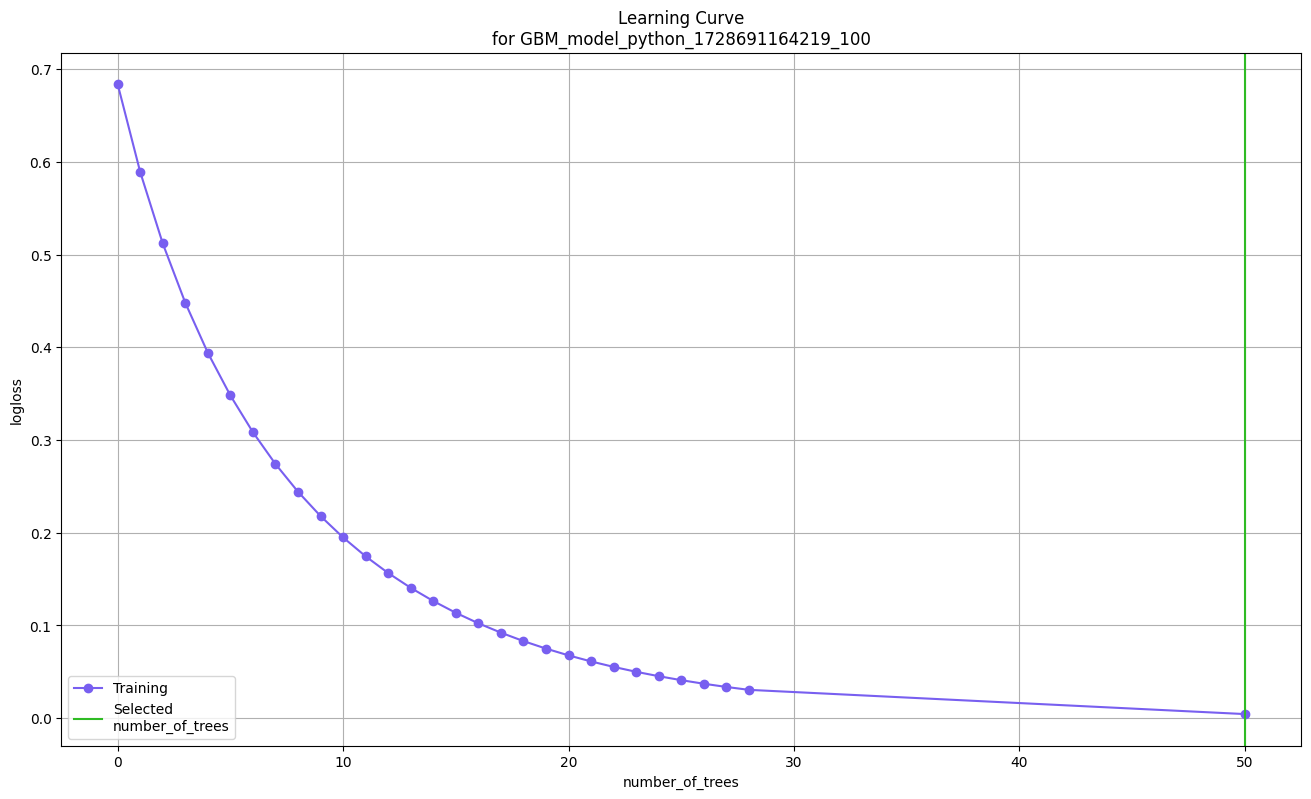

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

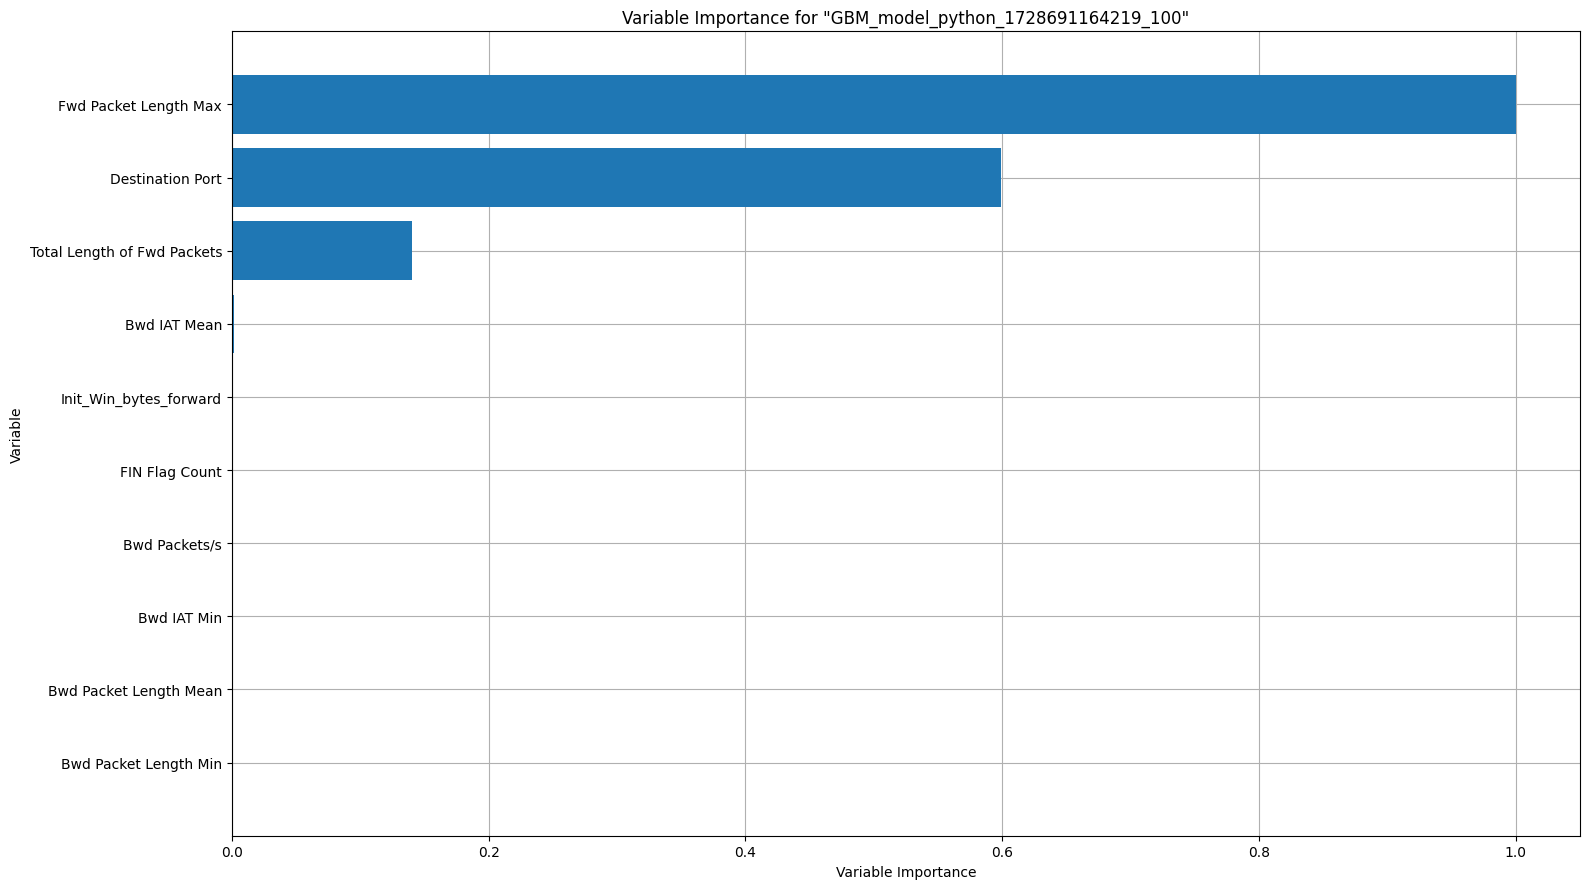

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_51_sid_a88c (levels (tmp= py_50_sid_a88c (as.factor (cols_py py_49_sid_a88c np.str_('Label'))))))", 'session_id': '_sid_a88c'}


In [78]:
model.explain(frame=train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test)

# Ver las predicciones
print(predictions)

# Evaluar el modelo
performance = model.model_performance(test)



In [ ]:
print(performance)

In [ ]:
import os
import h2o

# Crear la carpeta 'model' en el directorio actual si no existe
os.makedirs('./model/', exist_ok=True)

# Guardar el modelo en esa carpeta con un nombre específico
model_path = h2o.save_model(model=model, path='./model/', force=True, filename='my_model.h2o')
print("Modelo guardado en:", model_path)


In [79]:
print(model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1728691164219_100


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          13992                  5            5            5             11            31            17.6

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00019453720866994132
RMSE: 0.013947659612635423
LogLoss: 0.004370077901327204
Mean Per-Class Error: 0.0001405147622180207
AUC: 0.9999998268396818
AUCPR: 0.9999998678138986
Gini: 0.9999996536793636

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29055947736234683
        BENIGN    DDoS    Error    Rate
------  --------  ------  ------